### 1. Introduction: Recommendation System based on RNN and CNN
- This is a jupyter notebook to show idea and instructions of how to build up a simple recommendation system based on series user customers behaviour using RNN and and CNN.
- Scenario (RNN)： We have customers' past behaviors data and what products they bought previously. The past information and products they bought can be treated as series data. For one customer, he or she can have several rows of data beacause previously he or she bought several products with corresponding past information, like age, marriage status, family size etc. we can use lstm a time series deep learning model to learn the customer bahaviors pattern to find which product they will buy next according to their previous behavior. This deep learning model so can be used as recommendation system. The latest product they bought is treated as a training lable, the previous information like age, marriage status, number of children and the products they already bought,ared used features for each time stage. The picture below represents the customer bebehavior.
![](image.png)
- Scenario (CNN): As we know,CNN is a kind of deep learning model is to extract the regional features of images, with high-performance in  doing images classification and recogintion. Now, we also can treated customer behaviour as images to do product prediction, the logic same as images classification.

In [8]:
import pandas as pd
import time
import numpy as np

In [4]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

### 2. Create Random DataSet

In [9]:
np.random.seed(10)

In [10]:
data_size = 100000

In [11]:
customer_size = 5000

In [12]:
customer_id = np.random.randint(0,customer_size,data_size)

In [13]:
customer_id = customer_id.reshape([len(customer_id),1])

In [14]:
customer_id.shape

(100000, 1)

In [15]:
np.random.seed(10)

In [16]:
feature_size = 30

In [17]:
features = np.random.random(size = (data_size,feature_size))

In [18]:
data = np.concatenate((customer_id,features),axis = 1)

In [19]:
data.shape

(100000, 31)

In [20]:
data = pd.DataFrame(data)

In [21]:
columns = ['customer_id']

In [22]:
features_columns = ['feature_%d'%_ for _ in range(1,feature_size+1)]

In [23]:
columns.extend(features_columns)

In [24]:
data.columns = columns

In [25]:
target_num = 5

In [26]:
np.random.seed(10)
target_field = np.random.randint(0,target_num,size = data_size)

In [27]:
target_field

array([1, 4, 0, ..., 1, 4, 3])

In [28]:
data['target'] = target_field

In [29]:
data.head()

,customer_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,target
0,1289.0,0.771321,0.020752,0.633648,0.748804,0.498507,0.224797,0.198063,0.760531,0.169111,...,0.142170,0.373341,0.674134,0.441833,0.434014,0.617767,0.513138,0.650397,0.601039,1
1,4623.0,0.805223,0.521647,0.908649,0.319236,0.090459,0.300700,0.113984,0.828681,0.046896,...,0.093460,0.821106,0.151152,0.384114,0.944261,0.987625,0.456305,0.826123,0.251374,4
2,1344.0,0.597372,0.902832,0.534558,0.590201,0.039282,0.357182,0.079613,0.305460,0.330719,...,0.513467,0.597837,0.262216,0.300871,0.025400,0.303063,0.242076,0.557578,0.565507,0
3,3441.0,0.475132,0.292798,0.064251,0.978819,0.339708,0.495049,0.977081,0.440774,0.318273,...,0.512334,0.673467,0.159194,0.050478,0.337816,0.108064,0.178903,0.885827,0.365365,1
4,1180.0,0.218769,0.752496,0.106880,0.744603,0.469785,0.598256,0.147620,0.184035,0.645072,...,0.791757,0.561557,0.877335,0.584196,0.708850,0.148533,0.428451,0.693890,0.104620,3


####### feature_1 is the date features, sort the behaviors from oldest to latest

In [30]:
data = data.sort_values(by=['customer_id','feature_1'],ascending=[True,True])

### 3: OneHotEncoding of Target Value

In [31]:
target_oneHot = pd.get_dummies(data=data['target'],prefix='target')

In [32]:
target_oneHot.head()

,target_0,target_1,target_2,target_3,target_4
51889,0,0,0,1,0
46994,0,0,0,1,0
14978,0,0,0,0,1
64830,1,0,0,0,0
37829,0,1,0,0,0


In [33]:
data.drop(labels='target',inplace=True,axis=1)

In [34]:
data = pd.concat([data,target_oneHot],axis = 1)

In [35]:
data.head()

,customer_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,target_0,target_1,target_2,target_3,target_4
51889,0.0,0.063120,0.749423,0.537111,0.850613,0.105087,0.085274,0.294656,0.709433,0.686156,...,0.937149,0.701153,0.063699,0.895404,0.536807,0,0,0,1,0
46994,0.0,0.159521,0.235517,0.167395,0.112889,0.341940,0.972764,0.204738,0.146144,0.187257,...,0.736712,0.730576,0.202271,0.721882,0.327341,0,0,0,1,0
14978,0.0,0.309795,0.411243,0.670433,0.976152,0.574918,0.001452,0.610816,0.675889,0.269606,...,0.163005,0.746287,0.674242,0.643898,0.119910,0,0,0,0,1
64830,0.0,0.329057,0.803545,0.331318,0.674232,0.669591,0.079732,0.211467,0.731866,0.353566,...,0.964159,0.697681,0.428046,0.217732,0.800923,1,0,0,0,0
37829,0.0,0.343327,0.657480,0.486471,0.081988,0.487649,0.432609,0.410132,0.621899,0.302678,...,0.393270,0.011887,0.235069,0.731576,0.448925,0,1,0,0,0


### 4. Visualization  of User Behaviors

In [36]:
import matplotlib.pyplot as plt

take customer id =1 as an example

In [37]:
data_0 = data[data.customer_id==0]

In [38]:
data_0

,customer_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,target_0,target_1,target_2,target_3,target_4
51889,0.0,0.063120,0.749423,0.537111,0.850613,0.105087,0.085274,0.294656,0.709433,0.686156,...,0.937149,0.701153,0.063699,0.895404,0.536807,0,0,0,1,0
46994,0.0,0.159521,0.235517,0.167395,0.112889,0.341940,0.972764,0.204738,0.146144,0.187257,...,0.736712,0.730576,0.202271,0.721882,0.327341,0,0,0,1,0
14978,0.0,0.309795,0.411243,0.670433,0.976152,0.574918,0.001452,0.610816,0.675889,0.269606,...,0.163005,0.746287,0.674242,0.643898,0.119910,0,0,0,0,1
64830,0.0,0.329057,0.803545,0.331318,0.674232,0.669591,0.079732,0.211467,0.731866,0.353566,...,0.964159,0.697681,0.428046,0.217732,0.800923,1,0,0,0,0
37829,0.0,0.343327,0.657480,0.486471,0.081988,0.487649,0.432609,0.410132,0.621899,0.302678,...,0.393270,0.011887,0.235069,0.731576,0.448925,0,1,0,0,0
27048,0.0,0.379392,0.167830,0.775259,0.625062,0.468299,0.978418,0.463808,0.144157,0.753293,...,0.052774,0.678438,0.157363,0.341157,0.698192,0,0,1,0,0
54156,0.0,0.396299,0.839793,0.323814,0.358130,0.895114,0.528366,0.878721,0.366733,0.229788,...,0.273389,0.210311,0.472133,0.237987,0.570161,1,0,0,0,0
27935,0.0,0.464490,0.619808,0.334383,0.663172,0.063783,0.251825,0.871301,0.366891,0.305339,...,0.879584,0.888607,0.620819,0.913919,0.310195,0,1,0,0,0
73500,0.0,0.520840,0.886360,0.810726,0.856555,0.060927,0.590513,0.303616,0.440074,0.943424,...,0.912049,0.665107,0.888779,0.176777,0.051172,0,0,0,1,0
76906,0.0,0.532631,0.866466,0.152611,0.833157,0.467054,0.635834,0.695769,0.982495,0.944871,...,0.522595,0.101330,0.504928,0.857576,0.836988,0,0,1,0,0


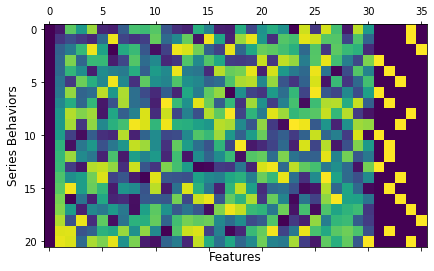

In [39]:
plt.matshow(data_0)
_= plt.xlabel('Features',fontsize = 12)
_ = plt.ylabel('Series Behaviors',fontsize = 12)
#### the right five columns represent which product this customer already bought, we select the latest product as training label

In [40]:
data.describe(percentiles=[0.25,0.5,0.75,0.9])

,customer_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,target_0,target_1,target_2,target_3,target_4
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2502.796160,0.499925,0.499552,0.500318,4.995526e-01,0.499654,0.501390,5.024351e-01,0.498278,0.500456,...,0.500486,0.499140,5.006047e-01,0.498753,0.499926,0.197610,0.199790,0.199780,0.201420,0.201400
std,1444.493331,0.288981,0.289076,0.288272,2.887521e-01,0.288970,0.289265,2.888097e-01,0.288952,0.288520,...,0.288817,0.288924,2.888658e-01,0.287994,0.289395,0.398198,0.399844,0.399837,0.401063,0.401048
min,0.000000,0.000020,0.000019,0.000028,8.590804e-07,0.000003,0.000021,8.615478e-07,0.000002,0.000017,...,0.000008,0.000002,8.719095e-07,0.000006,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.000000,0.249672,0.248736,0.250750,2.495161e-01,0.248942,0.251044,2.528019e-01,0.246694,0.251271,...,0.250103,0.249622,2.508414e-01,0.251253,0.249556,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,0.500836,0.498946,0.501670,4.989956e-01,0.500075,0.502743,5.035209e-01,0.497162,0.500716,...,0.500658,0.498206,5.003531e-01,0.496527,0.500430,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3753.000000,0.749951,0.750640,0.749293,7.497122e-01,0.748929,0.753093,7.536245e-01,0.748958,0.751044,...,0.751245,0.748836,7.518013e-01,0.746775,0.751228,0.000000,0.000000,0.000000,0.000000,0.000000
90%,4511.000000,0.900596,0.901285,0.899008,9.000227e-01,0.900218,0.902296,9.013793e-01,0.898643,0.899716,...,0.899904,0.900714,9.002322e-01,0.899789,0.900215,1.000000,1.000000,1.000000,1.000000,1.000000
max,4999.000000,0.999999,0.999994,0.999997,9.999939e-01,0.999995,0.999974,9.999988e-01,1.000000,0.999994,...,0.999999,0.999996,9.999886e-01,0.999999,0.999975,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
data.groupby('customer_id').size().describe(percentiles=[0.25,0.5,0.75,0.9])

count    5000.000000
mean       20.000000
std         4.498449
min         7.000000
25%        17.000000
50%        20.000000
75%        23.000000
90%        26.000000
max        41.000000
dtype: float64

##### setting of max length of series of customer behavior for model
-  padding 0 if the length of sequence is less than 26
- cutting the latest 26 sequence if the length is more than 26

In [42]:
max_lenghth = 26

### 5.Data preparation
- Select The Latest Product As Trainig Label
- Split Data Into Features Data and Label

#### Label extraction:

In [43]:
the_last_row = data.groupby('customer_id').tail(1)[target_oneHot.columns]

In [44]:
Y_matrix = the_last_row.values

In [45]:
Y_matrix.shape

(5000, 5)

#### Features extraction

In [46]:
features_data = data[~data.index.isin(the_last_row.index)]

In [47]:
extract_columns = list(data)

In [48]:
extract_columns.remove("customer_id")

##### create the behavior sequence by each customers

In [49]:
features_data = features_data.groupby(by='customer_id').apply(lambda x:x[extract_columns].values).reset_index(name='sequence_matrix')

In [50]:
features_data.head()

,customer_id,sequence_matrix
0,0.0,"[[0.06311956102820959, 0.7494234517440929, 0.5..."
1,1.0,"[[0.03595338771461243, 0.9791071779412864, 0.2..."
2,2.0,"[[0.006246678652088944, 0.614849281972803, 0.3..."
3,3.0,"[[0.002693082188991447, 0.1365331359354388, 0...."
4,4.0,"[[0.07657901600309203, 0.6788594903903369, 0.8..."


##### setting the max length of sequence of behaviors by each users

In [51]:
matrix_list = []
for matrix in features_data['sequence_matrix']:
    sequence_length = matrix.shape[0]
    feature_length = matrix.shape[1]
    matrix = matrix[::-1]
    
    if matrix.shape[0]>max_lenghth:
        matrix = matrix[sequence_length-max_lenghth:,:]
#         print(matrix.shape)
    elif matrix.shape[0]<max_lenghth:
        zero_matrix = np.zeros(shape =(max_lenghth-sequence_length,feature_length))
        matrix= np.concatenate((matrix,zero_matrix))
    
    matrix_list.append(matrix[::-1])

In [52]:
matrix.shape

(26, 35)

In [53]:
##### padding 0 if the length of sequence is less than 26

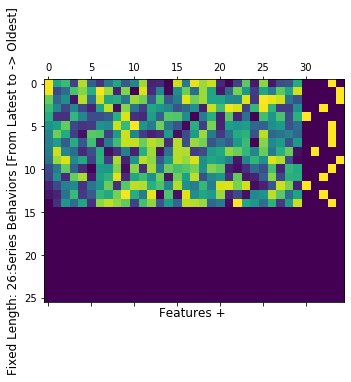

In [54]:
plt.matshow(matrix)
_= plt.xlabel('Features + ',fontsize = 12)
_ = plt.ylabel('Fixed Length: 26:Series Behaviors [From Latest to -> Oldest]',fontsize = 12)

###### we shift the historical infomation  from upper to bottom beacause the latest information as the input data of last stage for model can be strongly remembered by model and redudance of zeros as input of initial stage

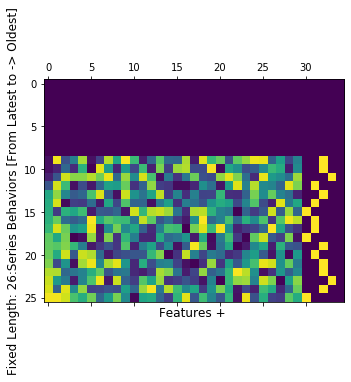

In [55]:
plt.matshow(matrix_list[1])
_= plt.xlabel('Features + ',fontsize = 12)
_ = plt.ylabel('Fixed Length: 26:Series Behaviors [From Latest to -> Oldest]',fontsize = 12)

In [56]:
X_matrix = np.array([np.array(matrix) for matrix in matrix_list])

In [57]:
X_matrix.shape

(5000, 26, 35)

In [58]:
Y_matrix.shape

(5000, 5)

### 6. create batch training data

In [59]:
batch_size = 64

In [60]:
def get_batch(X,Y,batch_size):
    batch_sum = 0
    data_size = X.shape[0]
    loop_size = data_size//batch_size
    for _ in range(loop_size):
        x = X[batch_sum:batch_sum+batch_size]
        y = Y[batch_sum:batch_sum+batch_size]
        
        batch_sum+=batch_size
        
        yield x,y

### 7.Model Construction

### RNN: LSTM

In [61]:
input_ph = tf.placeholder(shape=[None,max_lenghth,feature_length], dtype=tf.float32, name='input') ### batch_size, length, features
target_ph = tf.placeholder(shape=[None,target_num], dtype=tf.float32, name='target')

In [62]:
### function to create a LSTM Cell
def build_lstm(x,num_units, num_layers, keep_prob=1):
    
    def build_cell(num_units, keep_prob):
        cell = tf.nn.rnn_cell.LSTMCell(num_units,reuse=tf.AUTO_REUSE)
        cell = tf.nn.rnn_cell.DropoutWrapper(cell, output_keep_prob=keep_prob)
        return cell
    
    cell = tf.nn.rnn_cell.MultiRNNCell([build_cell(num_units, keep_prob) for _ in range(num_layers)])
    out, final_state = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)
    
    return out, final_state

In [63]:
def rnn_classify(inputs, rnn_units=100, rnn_layers=2, keep_prob=1,num_class = 10):

    rnn_out, rnn_state = build_lstm(x=inputs,num_units=rnn_units, num_layers=rnn_layers,keep_prob=keep_prob)
    
    net = slim.fully_connected(rnn_out, num_outputs=num_class, activation_fn=None, scope='classification')
    
    net = net[:,-1]
    return net
    

In [64]:
target_num

5

In [65]:
out = rnn_classify(input_ph,rnn_units=100,rnn_layers=2,keep_prob=1,num_class=target_num)

In [66]:
out.shape

TensorShape([Dimension(None), Dimension(5)])

In [67]:
target_ph.shape

TensorShape([Dimension(None), Dimension(5)])

In [68]:
loss = tf.losses.softmax_cross_entropy(logits=out, onehot_labels=target_ph)

In [69]:
acc =tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(out,dimension=1),tf.arg_max(target_ph,dimension=1)),dtype=tf.float32)) 

Instructions for updating:
Use `argmax` instead


In [70]:
#### defind optimizer
lr = 0.001
optimizer = tf.train.AdamOptimizer(lr)
train_op = optimizer.minimize(loss)

In [71]:
### create session to run the flow
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

##### training

In [72]:
target_ph.shape

TensorShape([Dimension(None), Dimension(5)])

In [73]:
start=time.clock()
time.sleep(20)
end=time.clock()
print('Time Used:{:.3f}'.format((end-start)/60))

Time Used:0.333


In [74]:
start=time.clock()

for i in range(60):
    loss_list = []
    acc_list = []
    for (X,Y) in get_batch(X_matrix,Y_matrix,batch_size=64):
        feed_dict={target_ph:Y,input_ph:X}
        sess.run(train_op,feed_dict=feed_dict)
        loss_train,acc_train = sess.run([loss,acc],feed_dict=feed_dict)
#         print(loss_train)
        loss_list.append(loss_train)
        acc_list.append(acc_train)
        
    if i%10==9:
        print('STEP {}: train_loss: {:.4f},accuracy:{:.4f}'.format(i+1,np.mean(loss_list),np.mean(acc_list)))

end=time.clock()
print('Time Used:{:.3f}'.format((end-start)/60))

STEP 10: train_loss: 1.6002,accuracy:0.2386
STEP 20: train_loss: 1.5480,accuracy:0.2963
STEP 30: train_loss: 1.3732,accuracy:0.4273
STEP 40: train_loss: 1.1186,accuracy:0.5643
STEP 50: train_loss: 0.5692,accuracy:0.8261
STEP 60: train_loss: 0.2173,accuracy:0.9585
Time Used:6.034


In [75]:
### predict the latest time purchase
predict_result = []
real_result = []
index = 0
for (X,Y) in get_batch(X_matrix,Y_matrix,batch_size):
    if index==0:
        pred = sess.run(out,feed_dict={input_ph:X})
    break

In [76]:
np.argmax(pred,1)

array([3, 4, 2, 4, 1, 3, 2, 0, 4, 1, 0, 0, 0, 3, 0, 4, 4, 4, 2, 4, 4, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 4, 0, 2, 0, 0, 2, 0, 3, 2, 3, 0, 2,
       4, 4, 3, 2, 0, 4, 4, 2, 4, 4, 3, 1, 2, 2, 0, 0, 0, 4, 2, 3],
      dtype=int64)

In [77]:
np.argmax(Y,1)

array([3, 4, 2, 4, 1, 3, 2, 0, 4, 1, 0, 0, 0, 3, 2, 4, 4, 4, 2, 4, 4, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 4, 0, 2, 0, 0, 2, 0, 3, 2, 3, 0, 2,
       4, 4, 1, 2, 0, 4, 0, 2, 4, 4, 3, 2, 2, 2, 0, 0, 0, 4, 2, 3],
      dtype=int64)

In [81]:
np.mean((np.argmax(pred,1)==np.argmax(Y,1)))

0.9375

### CNN
- The user behaviors can be treated as an images, so we can use CNN model as recommendation enginee

In [82]:
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from keras.layers import Activation
from keras.models import Sequential
from keras.optimizers import Adam 

In [83]:
model = Sequential()

In [84]:
model.add(Conv2D( 
    input_shape = (max_lenghth,feature_length,1),
    filters = 32,
    kernel_size = 5,
    strides = 1, ### 步长 
    padding = 'same', 
    activation = 'relu' 

)) 

In [85]:
model.add(MaxPool2D( 
    pool_size = 2,
    strides = 2,
    padding = 'same', 

))

In [86]:

model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same',activation = 'relu')) 

model.add(MaxPool2D(pool_size=2,strides=2,padding='same')) 

In [87]:
model.add(Flatten()) 

In [88]:
model.add(Dense(512,activation = 'relu')) 

In [89]:
model.add(Dropout(0.8)) 

In [90]:
model.add(Dense(target_num,activation='softmax'))

In [91]:
adam = Adam(lr=1e-4) 
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy']) 

In [92]:
X_matrix.shape

(5000, 26, 35)

In [93]:
X_matrix_CNN = X_matrix.reshape(-1,max_lenghth,feature_length,1)

In [94]:
Y_matrix.shape

(5000, 5)

In [95]:
X_matrix_CNN.shape

(5000, 26, 35, 1)

In [96]:
start=time.clock()
model.fit(X_matrix_CNN,Y_matrix,batch_size=64,epochs=55) 
loss,accuracy = model.evaluate(X_matrix_CNN,Y_matrix) 
print('train loss',loss) 
print('train accuracy',accuracy)
end=time.clock()
print('Time Used:{:.3f}'.format((end-start)/60))

Epoch 1/55
5000/5000 [==============================] - 5s - loss: 1.6195 - acc: 0.2028     
Epoch 2/55
5000/5000 [==============================] - 3s - loss: 1.6113 - acc: 0.2152     
Epoch 3/55
5000/5000 [==============================] - 3s - loss: 1.6079 - acc: 0.2170     
Epoch 4/55
5000/5000 [==============================] - 3s - loss: 1.6083 - acc: 0.2158     
Epoch 5/55
5000/5000 [==============================] - 3s - loss: 1.6071 - acc: 0.2142     
Epoch 6/55
5000/5000 [==============================] - 3s - loss: 1.6052 - acc: 0.2334     
Epoch 7/55
5000/5000 [==============================] - 3s - loss: 1.6028 - acc: 0.2286     
Epoch 8/55
5000/5000 [==============================] - 3s - loss: 1.6015 - acc: 0.2350     
Epoch 9/55
5000/5000 [==============================] - 3s - loss: 1.6001 - acc: 0.2420     
Epoch 10/55
5000/5000 [==============================] - 3s - loss: 1.5990 - acc: 0.2436     
Epoch 11/55
5000/5000 [==============================] - 3s - loss: 1

4928/5000 [============================>.] - ETA: 0strain loss 0.21278001284599304
train accuracy 0.9966
Time Used:3.450


#### By simple comparation, the performance of CNN is obviously better than that of CNN, and its training time is shorter than RNN.
because the RNN is trained serially each stage but CNN directly read the images as input data.